# Dataset visualization

### Nececary imports

In [14]:
from ipynb.fs.full.Utils import load_dataset, scale_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Reading the data

In [15]:
df = load_dataset(split=False)

### Attributes

In [16]:
df.keys()

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category', 'A', 'A#', 'B', 'C', 'C#',
       'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype='object')

In [17]:
df.shape

(20653, 25)

### Overview

In [18]:
df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0.375,0.574,-5.305,1,0.0315,0.14300,0.000000,0.110,0.406,132.025,...,0,0,0,0,0,0,0,0,1,0
1,0.687,0.750,-4.537,1,0.0965,0.10700,0.000003,0.161,0.911,98.987,...,1,0,0,0,0,0,0,0,0,0
2,0.624,0.822,-4.434,1,0.0340,0.07410,0.000000,0.332,0.370,120.059,...,0,0,0,0,0,0,0,0,1,0
3,0.549,0.869,-4.905,0,0.0289,0.00261,0.000002,0.290,0.433,91.988,...,0,0,0,0,0,1,0,0,0,0
4,0.630,0.692,-6.709,1,0.0606,0.06730,0.000000,0.200,0.593,119.972,...,1,0,0,0,0,0,0,0,0,0


### Attribute value distributions

In [19]:
s = ''
for category in df.category.unique():
    s += "%25s | %5d\n" % (category, int(df[df.category == category].shape[0]))
print(s)

                  country |   771
                indie_alt |   768
                  workout |   600
                     punk |   704
                    chill |  6446
                    metal |   750
                      rnb |   488
                      pop |   105
                   hiphop |   917
                    latin |   556
                classical |  6446
                    party |   527
                     rock |   887
                     jazz |   688



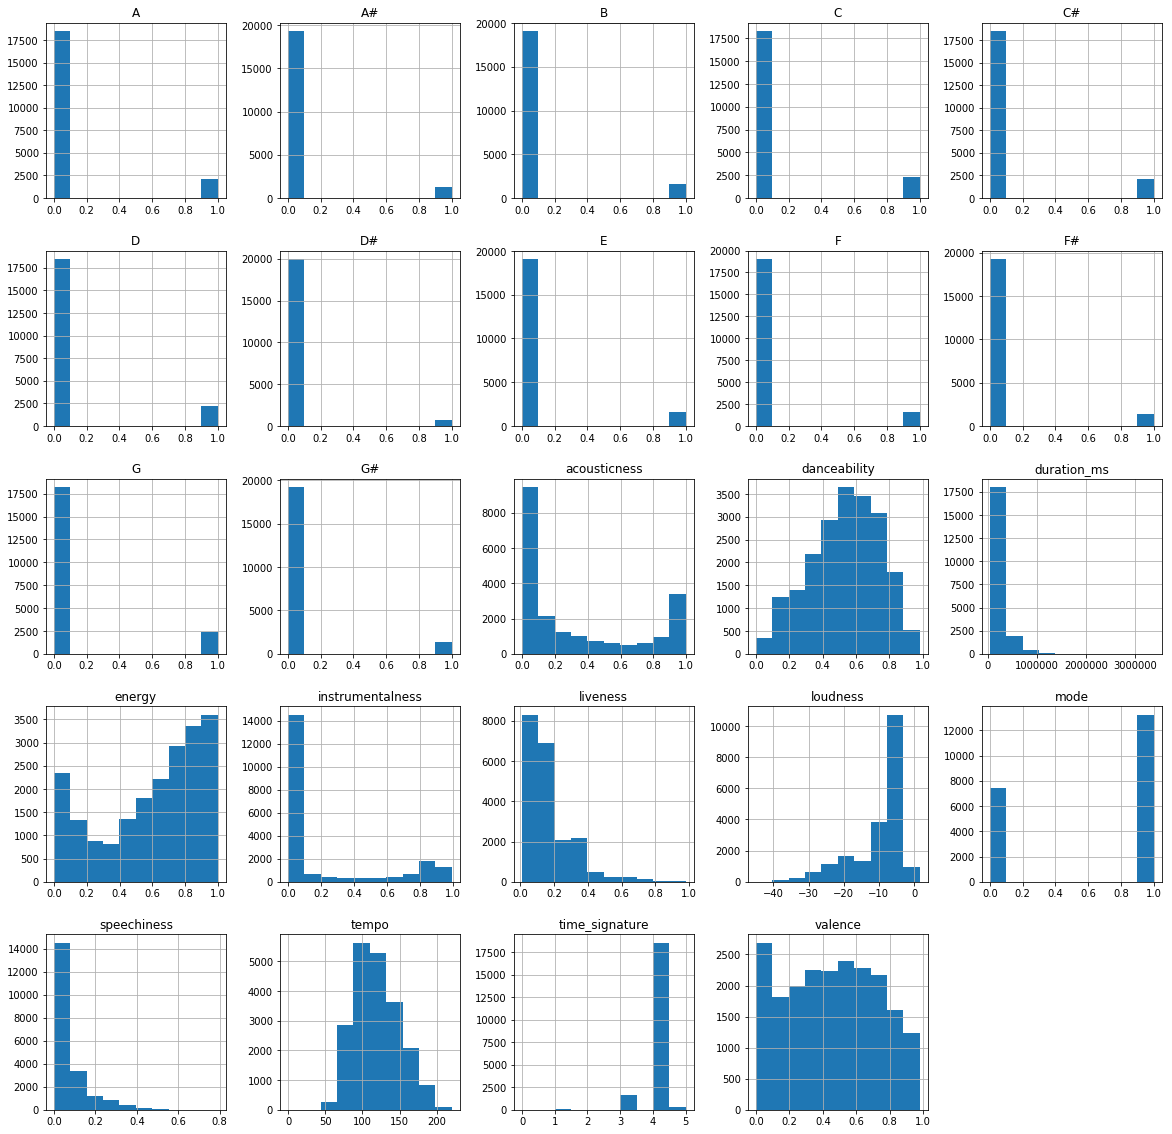

In [20]:
pd.DataFrame.hist(df, figsize=[20,20]);

In [21]:
maxv = df.max(axis=0)
maxv = maxv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])
minv = df.min(axis=0)
minv = minv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])

s = ''
for k in maxv.keys():
    s += "%25s | min: %15.5f | max: %15.5f\n" % (k, float(minv[k]), float(maxv[k]))
print(s)

             danceability | min:         0.00000 | max:         0.98100
                   energy | min:         0.00021 | max:         0.99900
                 loudness | min:       -44.92000 | max:         1.58500
              speechiness | min:         0.00000 | max:         0.79100
             acousticness | min:         0.00000 | max:         0.99600
         instrumentalness | min:         0.00000 | max:         0.99300
                 liveness | min:         0.01090 | max:         0.97900
                  valence | min:         0.00000 | max:         0.97900
                    tempo | min:         0.00000 | max:       220.01800
              duration_ms | min:     41667.00000 | max:   3383971.00000



### Null values

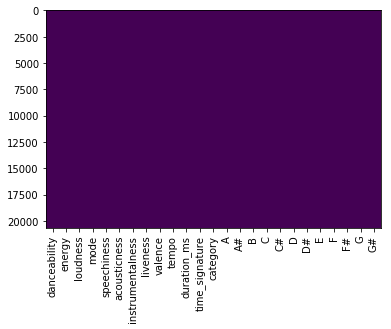

In [22]:
number_of_columns = df.shape[1]
plt.xticks(range(0, number_of_columns), df.columns, rotation='vertical')
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')

### Data relations

In [23]:
import pylab

In [24]:
colors = [int(i % 23) for i in df['category']]

TypeError: not all arguments converted during string formatting

#### Energy vs. Loudness

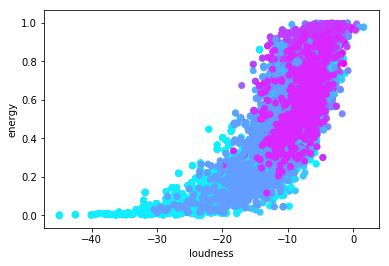

In [40]:
plt.xlabel('loudness')
plt.ylabel('energy')
pylab.scatter(df['loudness'], df['energy'], c=colors, cmap=pylab.cm.cool)
pylab.show()

#### Loudness vs. tempo

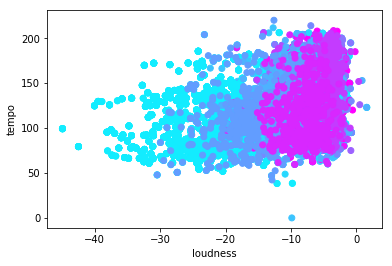

In [41]:
plt.xlabel('loudness')
plt.ylabel('tempo')
pylab.scatter(df['loudness'], df['tempo'], c=colors, cmap=pylab.cm.cool)
pylab.show()

#### Popularity vs. valence

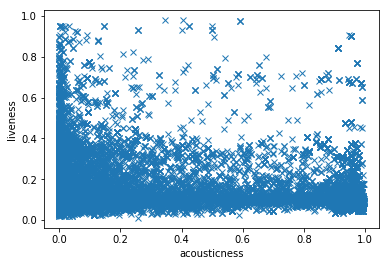

In [12]:
plt.xlabel('acousticness')
plt.ylabel('liveness')
pylab.scatter(df['acousticness'], df['liveness'], c=colors, cmap=pylab.cm.cool)
pylab.show()

#### Danceability vs. valence

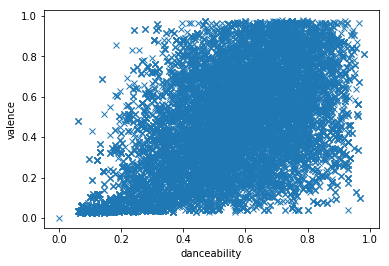

In [13]:
plt.xlabel('danceability')
plt.ylabel('valence')
pylab.scatter(df['danceability'], df['valence'], c=colors, cmap=pylab.cm.cool)
pylab.show()

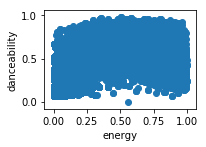

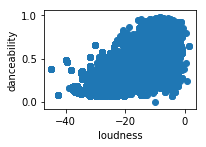

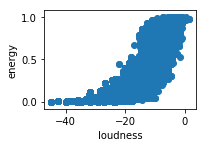

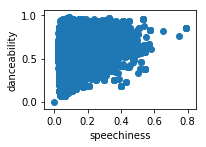

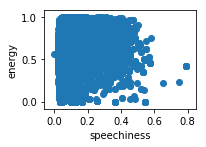

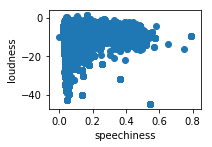

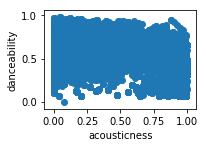

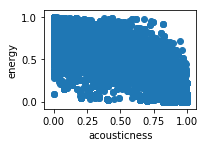

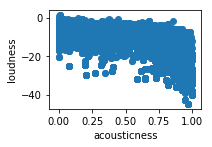

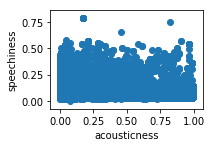

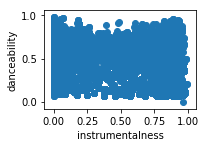

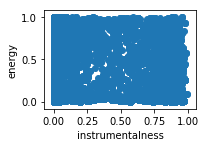

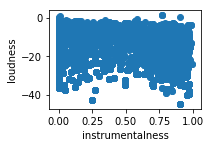

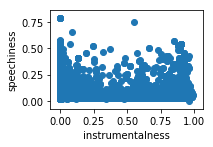

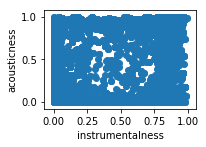

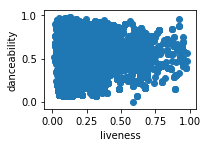

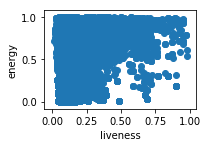

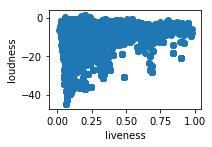

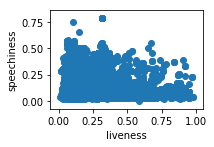

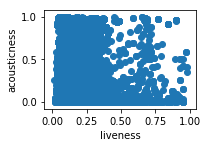

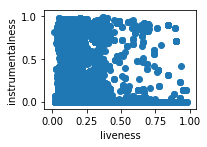

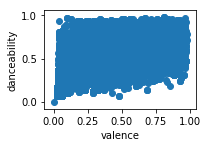

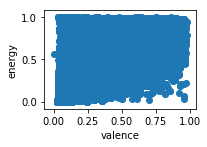

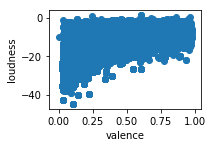

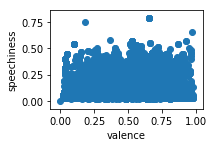

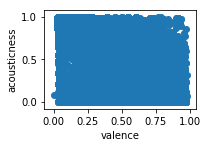

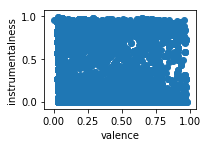

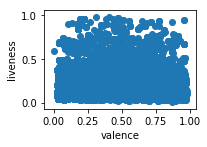

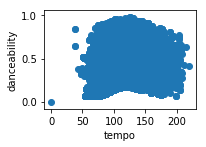

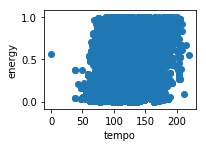

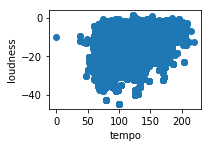

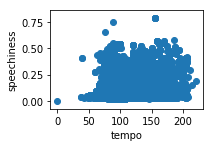

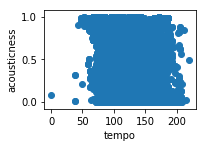

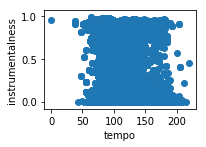

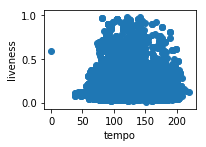

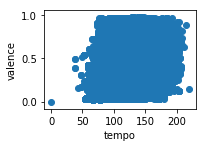

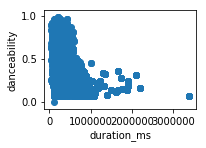

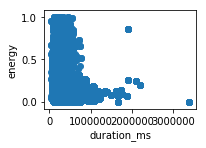

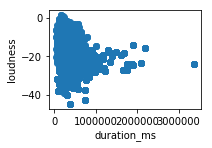

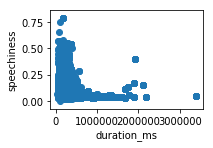

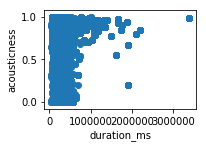

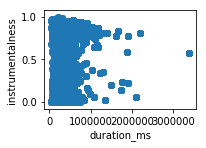

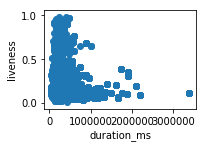

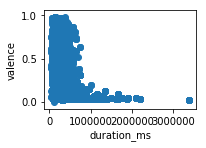

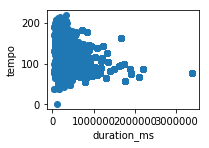

In [65]:
keys = df.keys().drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])
for k1 in keys:
    for k2 in keys:
        if k1 == k2:
            break
        else:
            plt.subplot(2, 2, 2)
            plt.xlabel(k1)
            plt.ylabel(k2)
            pylab.scatter(df[k1], df[k2], cmap=pylab.cm.cool)
            pylab.show()